

```
# This is formatted as code
```

# ***ANALYSING MOVIE BOX OFFICE DATA***

In [1]:
# loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Loading the dataset
df=pd.read_csv('/content/IMDB top 1000.csv')
df

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"
...,...,...,...,...,...,...,...,...,...,...
995,995,398. Scent of a Woman (1992),R,156 min,Drama,8.0,NaN,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M"
996,996,399. Aladdin (1992),G,90 min,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M"
997,997,400. JFK (1991),R,189 min,"Drama, History, Thriller",8.0,72.0,New Orleans District Attorney Jim Garrison dis...,"Director: Oliver Stone | Stars: Kevin Costner,...","Votes: 139,634 | Gross: $70.41M"
998,998,301. Nights of Cabiria (1957),Not Rated,110 min,Drama,8.1,NaN,A waifish prostitute wanders the streets of Ro...,Director: Federico Fellini | Stars: Giulietta ...,"Votes: 42,160 | Gross: $0.75M"


In [3]:
#returns a numpy array with the underlying data of the DataFrame, without any index or columns names.
df.values

array([[0, '1. The Shawshank Redemption (1994)', 'R', ...,
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'Director: Frank Darabont | Stars: Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
        'Votes: 2,295,987 | Gross: $28.34M'],
       [1, '2. The Godfather (1972)', 'R', ...,
        'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
        'Director: Francis Ford Coppola | Stars: Marlon Brando, Al Pacino, James Caan, Diane Keaton',
        'Votes: 1,584,782 | Gross: $134.97M'],
       [2, '3. The Dark Knight (2008)', 'PG-13', ...,
        'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
        'Director: Christopher Nolan | Stars: Christian Bale, Heath Ledger, Aaron Eck

In [4]:
#finding the datatypes of the attributes
df.dtypes

Unnamed: 0       int64
Title           object
Certificate     object
Duration        object
Genre           object
Rate           float64
Metascore      float64
Description     object
Cast            object
Info            object
dtype: object

In [5]:
# printing first 10 rows of the dataset
df.head(10)

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"
5,5,6. Pulp Fiction (1994),R,154 min,"Crime, Drama",8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...",Director: Quentin Tarantino | Stars: John Trav...,"Votes: 1,792,919 | Gross: $107.93M"
6,6,7. Schindler's List (1993),R,195 min,"Biography, Drama, History",8.9,94.0,"In German-occupied Poland during World War II,...",Director: Steven Spielberg | Stars: Liam Neeso...,"Votes: 1,191,793 | Gross: $96.90M"
7,7,8. 12 Angry Men (1957),Approved,96 min,"Crime, Drama",8.9,96.0,A jury holdout attempts to prevent a miscarria...,"Director: Sidney Lumet | Stars: Henry Fonda, L...","Votes: 674,629 | Gross: $4.36M"
8,8,9. Inception (2010),PG-13,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,A thief who steals corporate secrets through t...,Director: Christopher Nolan | Stars: Leonardo ...,"Votes: 2,022,655 | Gross: $292.58M"
9,9,10. Fight Club (1999),R,139 min,Drama,8.8,66.0,An insomniac office worker and a devil-may-car...,"Director: David Fincher | Stars: Brad Pitt, Ed...","Votes: 1,820,268 | Gross: $37.03M"


In [6]:
#printing last 6 rows of the dataset
df.tail(6)

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
994,994,"397. Blood In, Blood Out (1993)",R,180 min,"Crime, Drama",8.0,NaN,Based on the true life experiences of poet Jim...,Director: Taylor Hackford | Stars: Damian Chap...,"Votes: 28,464 | Gross: $4.50M"
995,995,398. Scent of a Woman (1992),R,156 min,Drama,8.0,NaN,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M"
996,996,399. Aladdin (1992),G,90 min,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M"
997,997,400. JFK (1991),R,189 min,"Drama, History, Thriller",8.0,72.0,New Orleans District Attorney Jim Garrison dis...,"Director: Oliver Stone | Stars: Kevin Costner,...","Votes: 139,634 | Gross: $70.41M"
998,998,301. Nights of Cabiria (1957),Not Rated,110 min,Drama,8.1,NaN,A waifish prostitute wanders the streets of Ro...,Director: Federico Fellini | Stars: Giulietta ...,"Votes: 42,160 | Gross: $0.75M"
999,999,302. Throne of Blood (1957),Not Rated,110 min,"Drama, History",8.1,NaN,"A war-hardened general, egged on by his ambiti...",Director: Akira Kurosawa | Stars: Toshirô Mifu...,"Votes: 45,579"


In [7]:
#printing the columns of the dataset
df.columns

Index(['Unnamed: 0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')

In [8]:
# Describing basic information of the data using describe() function
df.describe()

,Unnamed: 0,Rate,Metascore
count,1000.000000,1000.000000,712.000000
mean,499.500000,8.097500,81.001404
std,288.819436,0.169566,9.811801
min,0.000000,8.000000,61.000000
25%,249.750000,8.000000,73.000000
50%,499.500000,8.000000,82.000000
75%,749.250000,8.100000,88.250000
max,999.000000,9.300000,100.000000


In [9]:
#printing the shape,dimension and size of dataset
df.shape, df.ndim, df.size

((1000, 10), 2, 10000)

In [10]:
#returns descriptive statistics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


In [11]:
# finding the number of null values in each column
df.isnull().sum()

Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
dtype: int64

In [12]:


"""df=df[df['Metascore'].isna()]

meanVal = df1['Metascore'].mean()

df['Metascore'].fillna(value=meanVal, inplace=True)

#meanVal1 = imdb_df['Metascore'].mean()

#meanVal1"""



"df=df[df['Metascore'].isna()]\n\nmeanVal = df1['Metascore'].mean()\n\ndf['Metascore'].fillna(value=meanVal, inplace=True)\n\n#meanVal1 = imdb_df['Metascore'].mean()\n\n#meanVal1"

In [13]:
#finding the mode of the column 'Certificate'
df.Certificate.mode()

0    R
Name: Certificate, dtype: object

In [14]:
#replacing the null values with mode value 'R'
df["Certificate"].fillna( 'R', inplace = True)
df

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"
...,...,...,...,...,...,...,...,...,...,...
995,995,398. Scent of a Woman (1992),R,156 min,Drama,8.0,NaN,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M"
996,996,399. Aladdin (1992),G,90 min,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M"
997,997,400. JFK (1991),R,189 min,"Drama, History, Thriller",8.0,72.0,New Orleans District Attorney Jim Garrison dis...,"Director: Oliver Stone | Stars: Kevin Costner,...","Votes: 139,634 | Gross: $70.41M"
998,998,301. Nights of Cabiria (1957),Not Rated,110 min,Drama,8.1,NaN,A waifish prostitute wanders the streets of Ro...,Director: Federico Fellini | Stars: Giulietta ...,"Votes: 42,160 | Gross: $0.75M"


In [15]:
#finding the median of the column 'Metascore'
df.Metascore.median()

82.0

In [16]:
#replacing the null values with median value in Metascore column
df["Metascore"].fillna( 82, inplace = True)
df

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"
...,...,...,...,...,...,...,...,...,...,...
995,995,398. Scent of a Woman (1992),R,156 min,Drama,8.0,82.0,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M"
996,996,399. Aladdin (1992),G,90 min,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M"
997,997,400. JFK (1991),R,189 min,"Drama, History, Thriller",8.0,72.0,New Orleans District Attorney Jim Garrison dis...,"Director: Oliver Stone | Stars: Kevin Costner,...","Votes: 139,634 | Gross: $70.41M"
998,998,301. Nights of Cabiria (1957),Not Rated,110 min,Drama,8.1,82.0,A waifish prostitute wanders the streets of Ro...,Director: Federico Fellini | Stars: Giulietta ...,"Votes: 42,160 | Gross: $0.75M"


In [17]:
#checking if the null value is replace by mode or not
df.isnull().sum()

Unnamed: 0     0
Title          0
Certificate    0
Duration       0
Genre          0
Rate           0
Metascore      0
Description    0
Cast           0
Info           0
dtype: int64

In [18]:
# printing the value of row 4 and column Duration
df.at[4,"Duration"]

'201 min'

In [19]:
# printing the value of row 4 and column 3
df.iat[4,3]

'201 min'

In [20]:
# printing the value of row 10 and column Description
df.loc[10,'Description']

'A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.'

In [21]:
df.iloc[10]

Unnamed: 0                                                    10
Title          11. The Lord of the Rings: The Fellowship of t...
Certificate                                                PG-13
Duration                                                 178 min
Genre                                   Action, Adventure, Drama
Rate                                                         8.8
Metascore                                                   92.0
Description    A meek Hobbit from the Shire and eight compani...
Cast           Director: Peter Jackson | Stars: Elijah Wood, ...
Info                          Votes: 1,630,106 | Gross: $315.54M
Name: 10, dtype: object

In [22]:
df.groupby('Genre').sum()

<ipython-input-22-e34827e193af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Genre').sum()


,Unnamed: 0,Rate,Metascore
Genre,,,
"Action, Adventure",452,33.2,298.0
"Action, Adventure, Comedy",17799,232.9,2217.0
"Action, Adventure, Drama",4627,107.9,1048.0
"Action, Adventure, Fantasy",4851,81.6,695.0
"Action, Adventure, Sci-Fi",5212,97.7,867.0
...,...,...,...
"Horror, Sci-Fi",74,8.4,89.0
"Mystery, Romance, Thriller",119,8.3,100.0
"Mystery, Sci-Fi, Thriller",4830,56.0,518.0


In [23]:
df.groupby('Cast').sum()


<ipython-input-23-86bad62d265e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cast').sum()


,Unnamed: 0,Rate,Metascore
Cast,,,
"Director: Adam Elliot | Stars: Toni Collette, Philip Seymour Hoffman, Eric Bana, Barry Humphries",224,8.1,82.0
"Director: Aditya Chopra | Stars: Shah Rukh Khan, Kajol, Amrish Puri, Farida Jalal",253,8.1,82.0
"Director: Aditya Dhar | Stars: Vicky Kaushal, Paresh Rawal, Mohit Raina, Yami Gautam",83,8.3,82.0
"Director: Akira Kurosawa | Stars: Takashi Shimura, Nobuo Kaneko, Shin'ichi Himori, Haruo Tanaka",121,8.3,82.0
"Director: Akira Kurosawa | Stars: Tatsuya Nakadai, Akira Terao, Jinpachi Nezu, Daisuke Ryû",169,8.2,96.0
...,...,...,...
"Directors: Stanley Donen, Gene Kelly | Stars: Gene Kelly, Donald O'Connor, Debbie Reynolds, Jean Hagen",120,8.3,99.0
"Directors: Terry Gilliam, Terry Jones | Stars: Graham Chapman, John Cleese, Eric Idle, Terry Gilliam",174,8.2,91.0
"Directors: Victor Fleming, George Cukor, Sam Wood | Stars: Clark Gable, Vivien Leigh, Thomas Mitchell, Barbara O'Neil",4270,56.7,679.0


In [24]:
x=df['Duration']>('120 min')
x.sum()


685

In [25]:
df.count

<bound method DataFrame.count of      Unnamed: 0                                              Title  \
0             0                 1. The Shawshank Redemption (1994)   
1             1                            2. The Godfather (1972)   
2             2                          3. The Dark Knight (2008)   
3             3                   4. The Godfather: Part II (1974)   
4             4  5. The Lord of the Rings: The Return of the Ki...   
..          ...                                                ...   
995         995                       398. Scent of a Woman (1992)   
996         996                                399. Aladdin (1992)   
997         997                                    400. JFK (1991)   
998         998                      301. Nights of Cabiria (1957)   
999         999                        302. Throne of Blood (1957)   

    Certificate Duration                         Genre  Rate  Metascore  \
0             R  142 min                         Dr

In [26]:
df.groupby("Genre")["Rate"].count()

Genre
Action, Adventure              4
Action, Adventure, Comedy     29
Action, Adventure, Drama      13
Action, Adventure, Fantasy    10
Action, Adventure, Sci-Fi     12
                              ..
Horror, Sci-Fi                 1
Mystery, Romance, Thriller     1
Mystery, Sci-Fi, Thriller      7
Mystery, Thriller              4
Western                        3
Name: Rate, Length: 130, dtype: int64

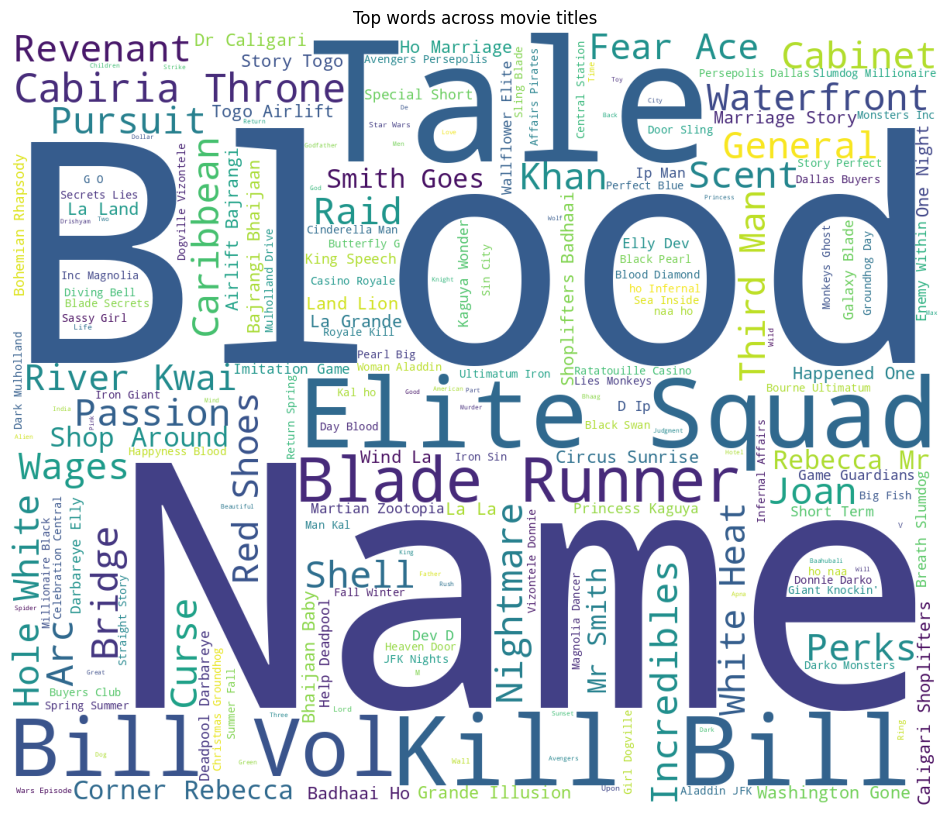

In [37]:
from wordcloud import WordCloud
plt.figure(figsize=(12,12))
text = ' '.join(df['Title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie titles')
plt.axis('off')
plt.show()